In [1]:
import networkx as nx
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas

%matplotlib inline

# Cho

In [2]:
datadir_cho = '../data/Cho_Braak_w_hipp_labels_gk/'
fnames = os.listdir(datadir_cho)

In [3]:
graphs = dict()
for idx, fname in enumerate(fnames):
    graphs[fname] = nx.read_gpickle(os.path.join(datadir_cho,fname))

In [4]:
adjs = np.zeros((2, 7, len(fnames)))
for idx, graph in enumerate(graphs.values()):
    tmp = nx.adj_matrix(graph).todense()[-2:, :]
    adjs[:, :, idx] = tmp

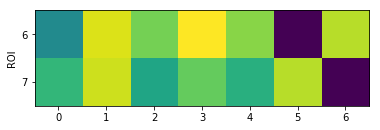

In [5]:
average_cho = np.mean(adjs, axis=2)
plt.imshow(np.log(average_cho+1))
plt.yticks([0, 1], [6,7])
plt.ylabel('ROI')
plt.show()

In [6]:
for_test = adjs[:,0,:]
stats.ttest_ind(for_test[0,:],for_test[1,:])

Ttest_indResult(statistic=-9.557951669645778, pvalue=2.1376527152142656e-18)

In [7]:
jnk = pandas.DataFrame(index=range(for_test.shape[1]*2),columns = ['connections to ERC','region'])
jnk.loc[jnk.index[:for_test.shape[1]],'connections to ERC'] = for_test[0,:]
jnk.loc[jnk.index[for_test.shape[1]]:,'connections to ERC'] = for_test[1,:]
jnk.loc[jnk.index[:for_test.shape[1]],'region'] = ['noise/subcortex'] * for_test.shape[1]
jnk.loc[jnk.index[for_test.shape[1]]:,'region'] = ['early tau'] * for_test.shape[1]

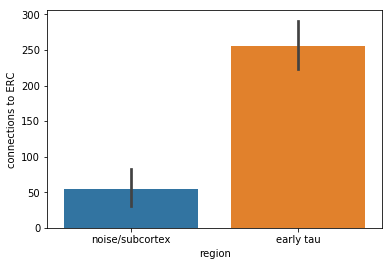

In [8]:
sns.barplot(x='region',y='connections to ERC',data=jnk)

In [9]:
fadjs = np.zeros((7, 7, len(fnames)))
for idx, graph in enumerate(graphs.values()):
    tmp = nx.adj_matrix(graph).todense()
    fadjs[:, :, idx] = tmp

In [10]:
np.save('../data/cho_connection_matrix', fadjs, allow_pickle=False)

# DKT

In [11]:
datadir_cho = '../data/DKT_w_hipp_labels_gk/'
fnames = os.listdir(datadir_cho)

In [12]:
graphs = dict()
for idx, fname in enumerate(fnames):
    graphs[fname] = nx.read_gpickle(os.path.join(datadir_cho,fname))

In [13]:
adjs = np.zeros((2, 85, len(fnames)))
for idx, graph in enumerate(graphs.values()):
    tmp = nx.adj_matrix(graph).todense()[-2:, :]
    adjs[:, :, idx] = tmp

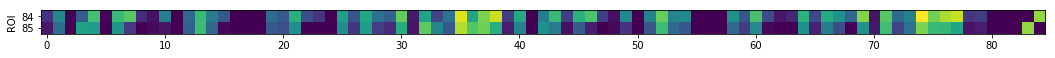

In [14]:
average_cho = np.mean(adjs, axis=2)
fig = plt.figure(figsize=(18,2))
plt.imshow(np.log(average_cho+1))
plt.yticks([0, 1], [84,85])
plt.ylabel('ROI')
plt.show()

## LH

In [15]:
for_test = adjs[:,3,:]
stats.ttest_ind(for_test[0,:],for_test[1,:])

Ttest_indResult(statistic=-13.362235805697079, pvalue=2.1188834163686529e-30)

In [16]:
jnk = pandas.DataFrame(index=range(for_test.shape[1]*2),columns = ['connections to ERC','region'])
jnk.loc[jnk.index[:for_test.shape[1]],'connections to ERC'] = for_test[0,:]
jnk.loc[jnk.index[for_test.shape[1]]:,'connections to ERC'] = for_test[1,:]
jnk.loc[jnk.index[:for_test.shape[1]],'region'] = ['noise/subcortex'] * for_test.shape[1]
jnk.loc[jnk.index[for_test.shape[1]]:,'region'] = ['early tau'] * for_test.shape[1]

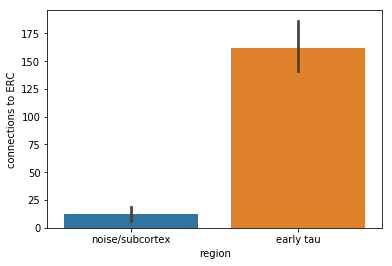

In [17]:
sns.barplot(x='region',y='connections to ERC',data=jnk)

## RH

In [18]:
for_test = adjs[:,42,:]
stats.ttest_ind(for_test[0,:],for_test[1,:])

Ttest_indResult(statistic=-3.0409599617935621, pvalue=0.0026366070784629016)

In [19]:
jnk = pandas.DataFrame(index=range(for_test.shape[1]*2),columns = ['connections to ERC','region'])
jnk.loc[jnk.index[:for_test.shape[1]],'connections to ERC'] = for_test[0,:]
jnk.loc[jnk.index[for_test.shape[1]]:,'connections to ERC'] = for_test[1,:]
jnk.loc[jnk.index[:for_test.shape[1]],'region'] = ['noise/subcortex'] * for_test.shape[1]
jnk.loc[jnk.index[for_test.shape[1]]:,'region'] = ['early tau'] * for_test.shape[1]

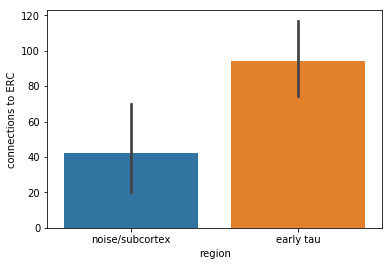

In [20]:
sns.barplot(x='region',y='connections to ERC',data=jnk)

In [21]:
fadjs = np.zeros((85, 85, len(fnames)))
for idx, graph in enumerate(graphs.values()):
    tmp = nx.adj_matrix(graph).todense()
    fadjs[:, :, idx] = tmp

In [22]:
np.save('../data/dkt_connection_matrix', fadjs, allow_pickle=False)